<a href="https://colab.research.google.com/github/miroslavkosanovic/toumorgenomeclustering/blob/main/Geni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive/')

# Read labels to pandas dataframe
labels = pd.read_csv('drive/My Drive/Klasifikacija gena/labels.csv', index_col=[0])
data = pd.read_csv('drive/My Drive/Klasifikacija gena/data.csv', index_col=[0])

Mounted at /content/drive/


Treba proveriti validnost podataka

In [ ]:
print(data.shape)
print(labels.shape)

print("Data nan:", data.isna().sum().sum())
print("Labels nan:", labels.isna().sum().sum())

#data.head()

(801, 20531)
(801, 1)
Data nan: 0
Labels nan: 0


In [ ]:
labels['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [ ]:
print(labels.Class.unique())
#max(data.max())
#min(data.min())
data.describe()

['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,0.688177,0.955504,2.667291,0.318108,0.214608,0.005879,0.003002,0.035498,2.204436,9.078900,3.286125,2.556424,8.266450,0.0,0.105504,0.526534,2.722476,9.209380,4.673866,6.182851,2.139337,1.168574,6.789898,2.284279,13.711217,8.545217,1.123570,0.202338,9.497384,1.363294,...,9.793412,10.284857,6.079328,7.945613,0.371288,4.905456,7.366911,7.049196,9.628212,2.354619,5.796625,7.744818,6.825166,3.859964,8.791191,8.045218,1.051505,6.031472,1.217945,8.147243,0.044261,6.856778,8.517432,7.347510,8.561671,8.021405,7.314292,8.687859,8.324222,8.788809,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,1.173568,0.877319,0.705767,0.673289,0.396474,0.065316,0.038493,0.192218,3.194977,1.203502,1.137231,2.448633,1.220976,0.0,0.411554,0.703966,2.667242,0.740969,2.049775,1.568571,3.160784,1.665570,0.857483,2.721062,1.272811,1.380301,1.369473,0.609529,0.425283,1.882621,...,0.503487,0.458172,0.811543,0.617257,0.757676,1.075023,0.809643,0.714542,1.376309,1.877525,0.893885,0.490483,0.485472,1.832004,0.524364,0.601594,1.264554,0.643518,0.697974,0.514244,0.175399,0.608048,0.743320,1.505049,0.636755,0.644683,0.576918,0.542212,0.823877,1.265211,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.437228,0.000000,0.000000,4.190164,0.0,0.000000,0.000000,0.000000,6.200934,0.000000,2.203890,0.000000,0.000000,4.238290,0.000000,9.378178,4.094641,0.000000,0.000000,7.191099,0.000000,...,8.113831,8.897349,2.583086,5.264987,0.000000,1.573908,4.253021,4.640604,4.383186,0.000000,1.066881,5.304664,5.124647,0.000000,6.729838,4.322945,0.000000,3.488194,0.000000,6.355971,0.000000,4.686904,5.555325,0.000000,5.709908,4.567479,0.000000,6.655299,6.294446,4.077841,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,0.000000,0.395831,2.243852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.286530,2.589260,0.000000,7.611490

Izbacivanje obelezja koja imaju vrednost nula u svakom uzorku

In [ ]:
data_cpy = data

to_drop = data_cpy.columns[(data_cpy.max() == 0) & (data_cpy.min() == 0)]
data_cpy.drop(to_drop, 1, inplace=True)
print(data_cpy.shape)


(801, 20264)


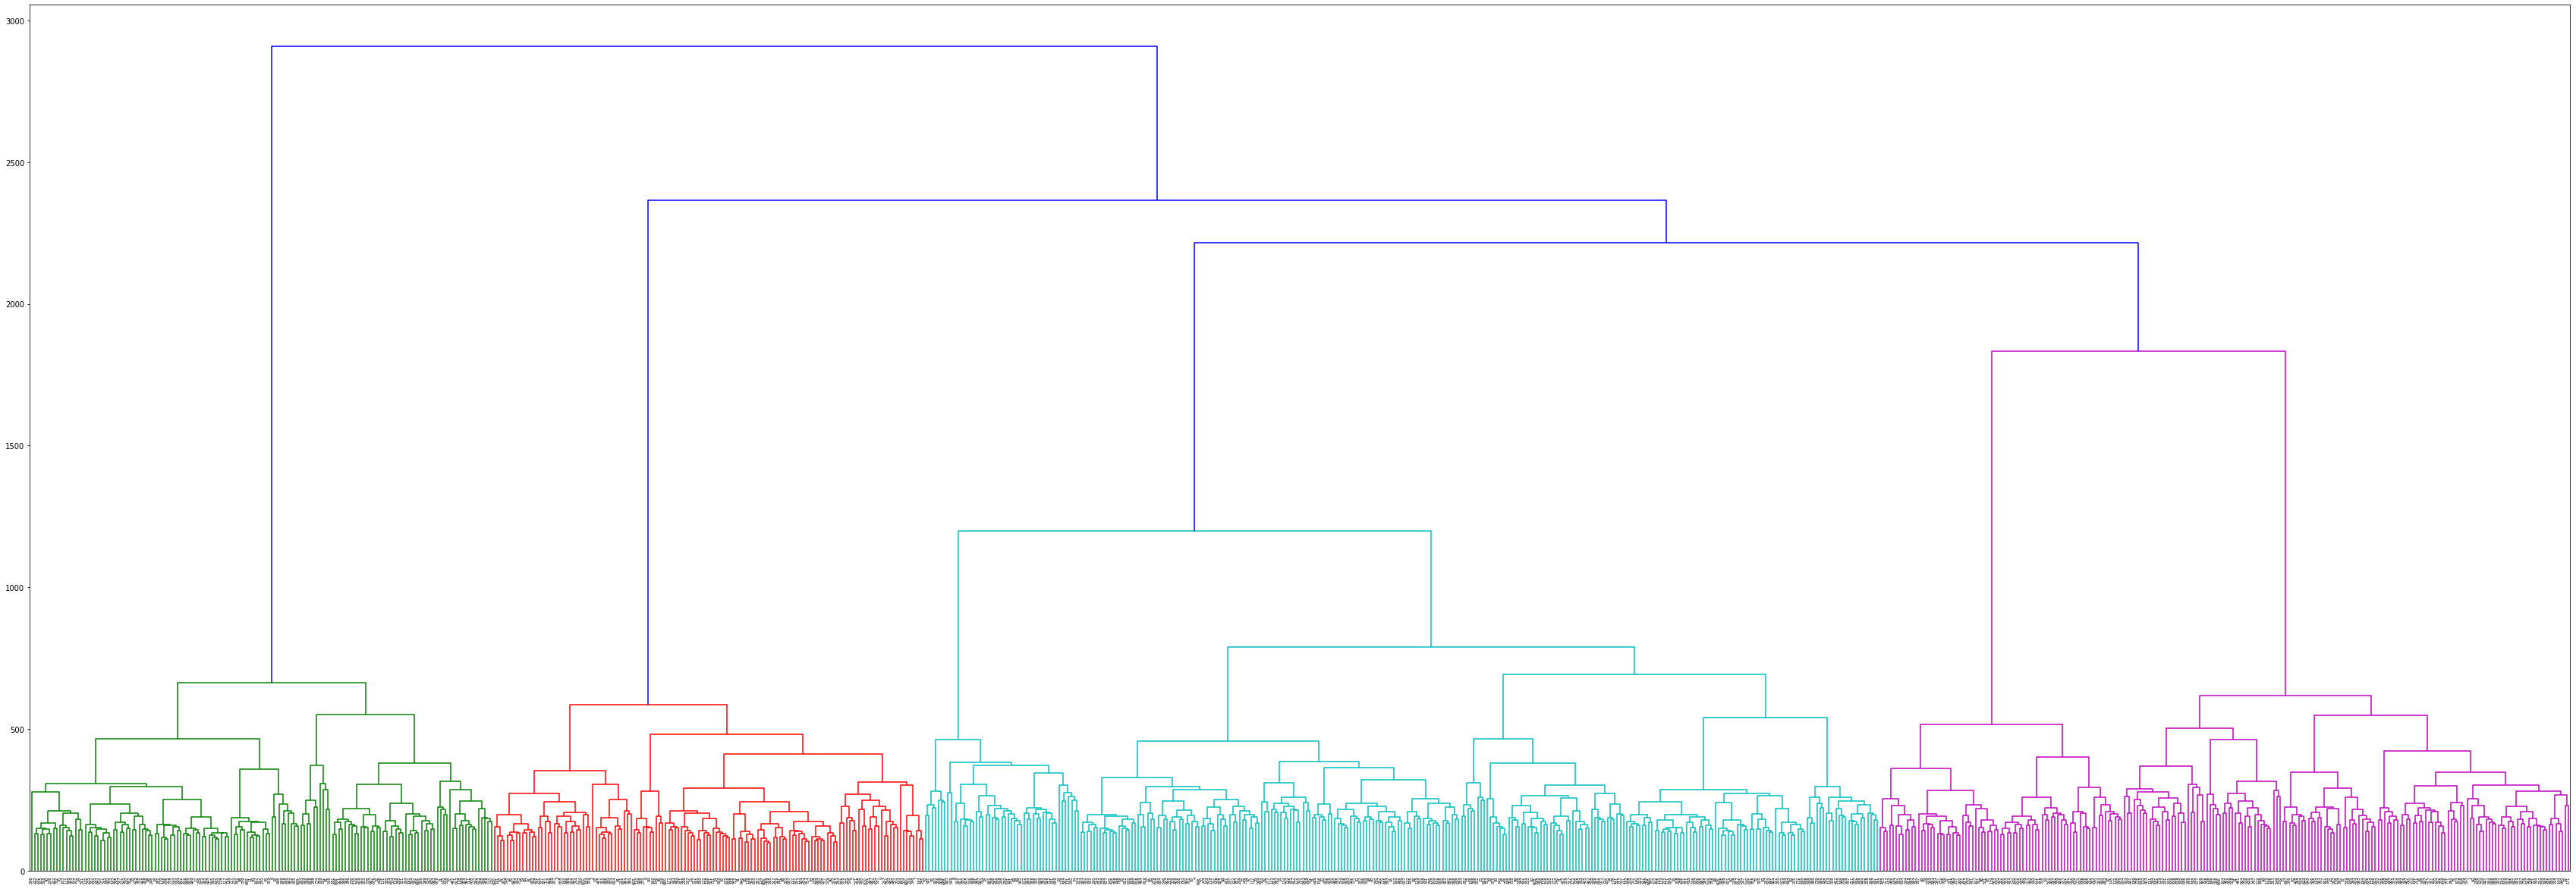

In [ ]:
plt.figure(figsize=(60,21))
dend = dendrogram(linkage(data_cpy, method='ward', metric='euclidean'), orientation='top',
                  distance_sort='descending', show_leaf_counts=True)

    Ljubicasti deo dendrograma deluje kao da se moze razdvojiti na dve manje celine

In [ ]:
def print_score(kmeans, agl, data, metric='euclidean'):
  print('ARI: ', metrics.adjusted_rand_score(agl.labels_, kmeans.labels_))
  print('SIL for AGG: ', metrics.silhouette_score(data, agl.labels_, metric=metric))
  print('SIL for Kmeans: ', metrics.silhouette_score(data, kmeans.labels_, metric=metric))
  #print('SIL for DBSCAN: ', metrics.silhouette_score(data, dbscan.labels_))
  print('')
  print('CH for AGG: ', metrics.calinski_harabasz_score(data, agl.labels_))
  print('CH for Kmeans: ', metrics.calinski_harabasz_score(data, kmeans.labels_))
  #print('CH for DBSCAN: ', metrics.calinski_harabasz_score(data, dbscan.labels_))
  print('')
  print('DB for AGG: ', metrics.davies_bouldin_score(data, agl.labels_))
  print('DB for Kmeans: ', metrics.davies_bouldin_score(data, kmeans.labels_))
  #print('DB for DBSCAN: ', metrics.davies_bouldin_score(data, dbscan.labels_))
  print()

In [ ]:
def testiraj_bez_ward(data):
  for clust in [4, 5]:
    for lin in ['single', 'complete', 'average']:
      for met in ['euclidean', 'cosine', 'manhattan', 'l1', 'l2']:
        aggl = AgglomerativeClustering(n_clusters=clust, affinity=met, linkage=lin)
        aggl.fit_predict(data)

        kmeans = KMeans(n_clusters=clust, n_init=10, max_iter=300, 
                    init='k-means++',random_state=42)
        kmeans.fit_predict(data)

        print('Broj klastera ', clust, ', linkage ', lin, ', metrika', met, ':')
        print_score(kmeans, aggl, data, metric=met)
        print('##########################################')

In [ ]:
for clust in [4, 5]:
  #for lin in ['ward', 'single', 'complete']:
  for lin in ['ward']:
    aggl = AgglomerativeClustering(n_clusters=clust, affinity='euclidean', linkage=lin)
    aggl.fit_predict(data)

    kmeans = KMeans(n_clusters=clust, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
    kmeans.fit_predict(data)

#    dbscan = DBSCAN(min_samples=10, eps=10)
#    dbscan.fit_predict(data)

    print('Broj klastera: ', clust, ', linkage: ', lin)
    print_score(kmeans,aggl ,data)
    print('##########################################')

Broj klastera:  4 , linkage:  ward
ARI:  0.9884681536520032
SIL for AGG:  0.201378353854356
SIL for Kmeans:  0.20127932414890426

CH for AGG:  129.33534642360436
CH for Kmeans:  129.49970071195847

DB for AGG:  2.001731725180524
DB for Kmeans:  2.0034262856652196

##########################################
Broj klastera:  5 , linkage:  ward
ARI:  0.9943736874333011
SIL for AGG:  0.22475991424365685
SIL for Kmeans:  0.22469293361216416

CH for AGG:  124.79659816424771
CH for Kmeans:  124.90536779774492

DB for AGG:  1.830705019555826
DB for Kmeans:  1.833528113149821

##########################################


**Najbolji rezultat:** broj klastera ->5, linkage -> ward

In [ ]:
#for clust in [4, 5]:
for clust in [5]:
  for lin in ['single', 'complete', 'average']:
    for met in ['euclidean', 'cosine', 'manhattan', 'l1', 'l2']:
      aggl = AgglomerativeClustering(n_clusters=clust, affinity=met, linkage=lin)
      aggl.fit_predict(data)

      kmeans = KMeans(n_clusters=clust, n_init=10, max_iter=300, 
                  init='k-means++',random_state=42)
      kmeans.fit_predict(data)

#      dbscan = DBSCAN(min_samples=10, eps=10)
#      dbscan.fit_predict(data)

      print('Broj klastera ', clust, ', linkage ', lin, ', metrika', met, ':')
      print_score(kmeans,aggl ,data, metric=met)
      print('##########################################')

Broj klastera  5 , linkage  single , metrika euclidean :
ARI:  0.0003976922126398296
SIL for AGG:  0.0795982295285852
SIL for Kmeans:  0.22469293361216416

CH for AGG:  1.7136669998995264
CH for Kmeans:  124.90536779774492

DB for AGG:  0.7700290477145899
DB for Kmeans:  1.833528113149821

##########################################
Broj klastera  5 , linkage  single , metrika cosine :
ARI:  0.0003976922126398296
SIL for AGG:  0.12859588746548362
SIL for Kmeans:  0.3793140924574584

CH for AGG:  1.7136669998995264
CH for Kmeans:  124.90536779774492

DB for AGG:  0.7700290477145899
DB for Kmeans:  1.833528113149821

##########################################
Broj klastera  5 , linkage  single , metrika manhattan :
ARI:  -0.0009061441059436204
SIL for AGG:  0.0974816895939727
SIL for Kmeans:  0.20821027370924186

CH for AGG:  1.7535155131214482
CH for Kmeans:  124.90536779774492

DB for AGG:  0.7632242913145332
DB for Kmeans:  1.833528113149821

##########################################


In [ ]:
for semp in [1, 5, 10, 50, 100]:
  for ep in [0.5, 1, 5, 10, 50, 100]:
    dbscan = DBSCAN(min_samples=semp, eps=ep)
    dbscan.fit(data)
    lab = dbscan.labels_
    print('min semp ', semp, ', epsilon ', ep, ':')
    print(len(set(lab)))


min semp  1 , epsilon  0.5 :
801
min semp  1 , epsilon  1 :
801
min semp  1 , epsilon  5 :
801
min semp  1 , epsilon  10 :
801
min semp  1 , epsilon  50 :
801
min semp  1 , epsilon  100 :
800
min semp  5 , epsilon  0.5 :
1
min semp  5 , epsilon  1 :
1
min semp  5 , epsilon  5 :
1
min semp  5 , epsilon  10 :
1
min semp  5 , epsilon  50 :
1
min semp  5 , epsilon  100 :
1
min semp  10 , epsilon  0.5 :
1
min semp  10 , epsilon  1 :
1
min semp  10 , epsilon  5 :
1
min semp  10 , epsilon  10 :
1
min semp  10 , epsilon  50 :
1
min semp  10 , epsilon  100 :
1
min semp  50 , epsilon  0.5 :
1
min semp  50 , epsilon  1 :
1
min semp  50 , epsilon  5 :
1
min semp  50 , epsilon  10 :
1
min semp  50 , epsilon  50 :
1
min semp  50 , epsilon  100 :
1
min semp  100 , epsilon  0.5 :
1
min semp  100 , epsilon  1 :
1
min semp  100 , epsilon  5 :
1
min semp  100 , epsilon  10 :
1
min semp  100 , epsilon  50 :
1
min semp  100 , epsilon  100 :
1


ARI treba da tezi 1, CH i SIL sto vece, a DB sto manja.


> Kada nemamo prave labele ARI mozemo da iskoristimo kako bi videli koliko se preklapaju rezultati dva algoritma


> Za racunanje SIL koristiti istu metriku kao i kod klasterizacije





Iste rezultate dobijamo kod data i kod data_cpy



Isprobati complete, average i single linkage


> "Ako se ne koristi euklidsko rastojanje, najbolja alternativa je average linkage"


> Kada imamo puno uzoraka i kada ocekujemo jednake velicine klastera zgodno je koristiti single linkage zbog dobre optimizacije trazenja rastojanja; Bice brze 






Treba smanjiti dimenzionalnost i ponovo izvrsiti klasterizaciju. Prvo standardizujemo pa isprobavamo PCA i LDA



> LDA pretpostavlja normalne raspodele i pomoću Bajesvog klasifikatora pronalazi ravan razdvajanja


> Može se upotrebiti za smanjenje dimenzionalnosti i klasifikaciju, ali i samo za smanjenje dimenzionalnosti


> Kod LDA možemo imati najviše onnoliko komponenata koliko ima klasa -1







In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=14)
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_test_std = s.transform(X_test)

In [ ]:
nC=[ 0.85, 0.9, 0.95, 0.97]
#primena pca sa razlicitim opsezima varijanse
for i in nC:
    pca = PCA(n_components=i)
    pca.fit(X_train_std)
    X_train_r = pca.transform(X_train_std)
    X_test_r = pca.transform(X_test_std)
    print('Prostor redukovan na ', i, '% varijanse ima dimenziju ', pca.n_components_)

Prostor redukovan na  0.85 % varijanse ima dimenziju  224
Prostor redukovan na  0.9 % varijanse ima dimenziju  312
Prostor redukovan na  0.95 % varijanse ima dimenziju  434
Prostor redukovan na  0.97 % varijanse ima dimenziju  500


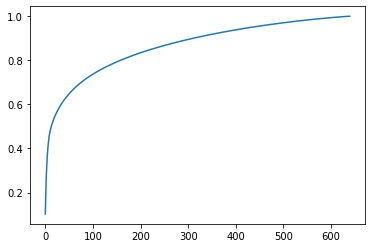

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train_r)

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
# init moze biti 'random' uzorci ili odredjene vrednosti date matricom
kmeans.fit_predict(X_train_r)
print('aglomerativno, 5 klastera, ward linkage:')
print_score(kmeans, cluster, X_train_r)

testiraj_bez_ward(X_train_r)

aglomerativno, 5 klastera, ward linkage:
ARI:  0.8850944711904983
SIL for AGG:  0.14178808126675174
SIL for Kmeans:  0.141003238741253

CH for AGG:  54.49830864225499
CH for Kmeans:  56.1311697667154

DB for AGG:  2.570876270248393
DB for Kmeans:  2.558210064874873

Broj klastera  4 , linkage  single , metrika euclidean :
ARI:  0.00249330989792759
SIL for AGG:  0.2942336671773038
SIL for Kmeans:  0.12357678477736389

CH for AGG:  3.431793708380114
CH for Kmeans:  59.46889459541115

DB for AGG:  0.5354879146244444
DB for Kmeans:  2.569256721464564

##########################################
Broj klastera  4 , linkage  single , metrika cosine :
ARI:  -0.0014096630100081944
SIL for AGG:  0.08950604798535383
SIL for Kmeans:  0.12357678477736389

CH for AGG:  1.6500386289895432
CH for Kmeans:  59.46889459541115

DB for AGG:  0.7853594604316385
DB for Kmeans:  2.569256721464564

##########################################
Broj klastera  4 , linkage  single , metrika manhattan :
ARI:  -0.00149

In [ ]:
for semp in [1, 5, 10, 50, 100]:
  for ep in [0.5, 1, 5, 10, 50, 100]:
    dbscan = DBSCAN(min_samples=semp, eps=ep)
    dbscan.fit(X_train_r)
    lab = dbscan.labels_
    print('min semp ', semp, ', epsilon ', ep, ':')
    print(len(set(lab)))

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(X_train_std, y_train)
X_train_r = lda.transform(X_train_std)
X_test_r = lda.transform(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
testiraj_bez_ward(X_train_r)

Broj klastera  4 , linkage  single , metrika euclidean :
ARI:  0.6239486097819213
SIL for AGG:  0.701845418716305
SIL for Kmeans:  0.7095119769133698

CH for AGG:  915.8496326956773
CH for Kmeans:  985.1771144760615

DB for AGG:  0.4707061435658197
DB for Kmeans:  0.6625778191414364

##########################################
Broj klastera  4 , linkage  single , metrika cosine :
ARI:  0.9949335072034209
SIL for AGG:  0.7090342786796037
SIL for Kmeans:  0.7095119769133698

CH for AGG:  984.4505817194513
CH for Kmeans:  985.1771144760615

DB for AGG:  0.6618344846996357
DB for Kmeans:  0.6625778191414364

##########################################
Broj klastera  4 , linkage  single , metrika manhattan :
ARI:  0.6239486097819213
SIL for AGG:  0.701845418716305
SIL for Kmeans:  0.7095119769133698

CH for AGG:  915.8496326956773
CH for Kmeans:  985.1771144760615

DB for AGG:  0.4707061435658197
DB for Kmeans:  0.6625778191414364

##########################################
Broj klastera  4 ,

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5
                                  , affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train_r)

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
# init moze biti 'random' uzorci ili odredjene vrednosti date matricom
kmeans.fit_predict(X_train_r)

print_score(kmeans, cluster, X_train_r)

ARI:  0.9953018327654104
SIL for AGG:  0.8122118886260921
SIL for Kmeans:  0.8127519087803048

CH for AGG:  4015.1762181810295
CH for Kmeans:  4029.0784523485654

DB for AGG:  0.25624926727964004
DB for Kmeans:  0.2526975791290715



In [ ]:
cluster = AgglomerativeClustering(n_clusters=5
                                  , affinity='manhattan', linkage='average')
cluster.fit_predict(X_train_r)

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
# init moze biti 'random' uzorci ili odredjene vrednosti date matricom
kmeans.fit_predict(X_train_r)

print_score(kmeans, cluster, X_train_r)

ARI:  1.0
SIL for AGG:  0.8127519087803048
SIL for Kmeans:  0.8127519087803048

CH for AGG:  4029.0784523485654
CH for Kmeans:  4029.0784523485654

DB for AGG:  0.2526975791290715
DB for Kmeans:  0.2526975791290715



**Najbolji rezultat za sad** LDA, 5 klastera, avg linkage, metrika manhattan  i l1




In [ ]:
for semp in [1, 5, 10, 50, 100]:
  for ep in [0.5, 1, 5, 10, 50, 100]:
    dbscan = DBSCAN(min_samples=semp, eps=ep)
    dbscan.fit(X_train_r)
    lab = dbscan.labels_
    print('min semp ', semp, ', epsilon ', ep, ':')
    print(len(set(lab)))

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train_r, quantile=0.2, n_samples=801)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_r)
labels = ms.labels_
print(len(set(labels)))

1


In [ ]:
print('SIL for Mean Shift: ', metrics.silhouette_score(X_train_r, ms.labels_))
print_score(kmeans,cluster,X_train_r)

ValueError: ignored

In [ ]:
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=801)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=False)
ms.fit(data)
labels = ms.labels_
print(len(set(labels)))

4


In [ ]:
print('SIL for Mean Shift: ', metrics.silhouette_score(data, ms.labels_))

SIL for Mean Shift:  0.11713169821869589
